In [3]:
# Exercise 1: Series

import pandas as pd
import numpy as np

# Step 1: Create a date range from 1st Jan 2010 to 31st Dec 2020
dates = pd.date_range(start='2010-01-01', end='2020-12-31', freq='D')

# Step 2: Create a Series with the number of days since 1st Jan 2010
integer_series = pd.Series(data=np.arange(len(dates)), index=dates)
print("First 10 values of the series:")
print(integer_series.head(10))

# Step 3: Compute a 7-day moving average
moving_average_7d = integer_series.rolling(window=7).mean()

print("\nFirst 10 values of the 7-day moving average:")
print(moving_average_7d.head(10))



First 10 values of the series:
2010-01-01    0
2010-01-02    1
2010-01-03    2
2010-01-04    3
2010-01-05    4
2010-01-06    5
2010-01-07    6
2010-01-08    7
2010-01-09    8
2010-01-10    9
Freq: D, dtype: int64

First 10 values of the 7-day moving average:
2010-01-01       NaN
2010-01-02       NaN
2010-01-03       NaN
2010-01-04       NaN
2010-01-05       NaN
               ...  
2020-12-27    4010.0
2020-12-28    4011.0
2020-12-29    4012.0
2020-12-30    4013.0
2020-12-31    4014.0
Freq: D, Length: 4018, dtype: float64


In [5]:
# Exercise 2: Financial data

import pandas as pd
import plotly.graph_objects as go

# Load CSV
df = pd.read_csv('apple.csv')

# Inspect first few rows
print(df.head())

# Convert Date column to datetime and set it as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Check for missing values
print(df.isna().sum())
df = df.dropna()  # Drop rows with missing values if any

fig = go.Figure(data=[go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    name="Apple Stock"
)])

fig.update_layout(
    title='Apple Stock Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price (USD)'
)

fig.show()

# Aggregate: take last business day for Open, High, Low, Close
monthly_data = df.resample('M').agg({
    'Open': 'first',   # opening price of the month
    'High': 'max',     # max during the month
    'Low': 'min',      # min during the month
    'Close': 'last'    # closing price of the month
})

print("Number of months in dataset:", len(monthly_data))
print(monthly_data.head())


# daily_returns = df['Open'].pct_change()
# print(daily_returns.head())

daily_returns_vectorized = (df['Open'] - df['Open'].shift(1)) / df['Open'].shift(1)
print(daily_returns_vectorized.head())




FileNotFoundError: [Errno 2] No such file or directory: 'apple.csv'

In [6]:
# Exercise 3: Multi asset returns
import pandas as pd
import numpy as np

# Business dates
business_dates = pd.bdate_range('2021-01-01', '2021-12-31')

# Tickers
tickers = ['AAPL', 'FB', 'GE', 'AMZN', 'DAI']

# MultiIndex
index = pd.MultiIndex.from_product([business_dates, tickers], names=['Date', 'Ticker'])

# Create market data
market_data = pd.DataFrame(index=index, data=np.random.randn(len(index), 1)*100 + 1000, columns=['Price'])
market_data.head(10)

prices = market_data.reset_index().pivot_table(index='Date', columns='Ticker', values='Price')
print(prices.head())

# Option 1: using pct_change()
daily_returns = prices.pct_change()

# Option 2: using vectorized formula
# daily_returns = (prices - prices.shift(1)) / prices.shift(1)

print(daily_returns.head())



Ticker             AAPL         AMZN          DAI           FB           GE
Date                                                                       
2021-01-01   898.596555   876.664173  1041.208550   927.901628   906.375120
2021-01-04   951.504909  1104.783307   808.101389   912.942030  1037.584415
2021-01-05  1098.491426  1166.667183  1028.239670   938.049113  1067.199497
2021-01-06   942.567315   952.160191   958.245337  1001.868636   957.678715
2021-01-07  1183.431205   875.566567   943.757405   929.518489   940.263136
Ticker          AAPL      AMZN       DAI        FB        GE
Date                                                        
2021-01-01       NaN       NaN       NaN       NaN       NaN
2021-01-04  0.058879  0.260213 -0.223881 -0.016122  0.144763
2021-01-05  0.154478  0.056014  0.272414  0.027501  0.028542
2021-01-06 -0.141944 -0.183863 -0.068072  0.068034 -0.102624
2021-01-07  0.255540 -0.080442 -0.015119 -0.072215 -0.018185


            Adj Close  future_return
Date                                
1980-12-12   0.101073      -0.052170
1980-12-15   0.095800      -0.073403
1980-12-16   0.088768       0.024750
1980-12-17   0.090965       0.029000
1980-12-18   0.093603       0.061024
            long_only_signal
Date                        
1980-12-12                 0
1980-12-15                 1
1980-12-16                 0
1980-12-17                 0
1980-12-18                 0
Total PnL of strategy: 4.9796015413272965
Total PnL of always-buy strategy: 11.399970243183244


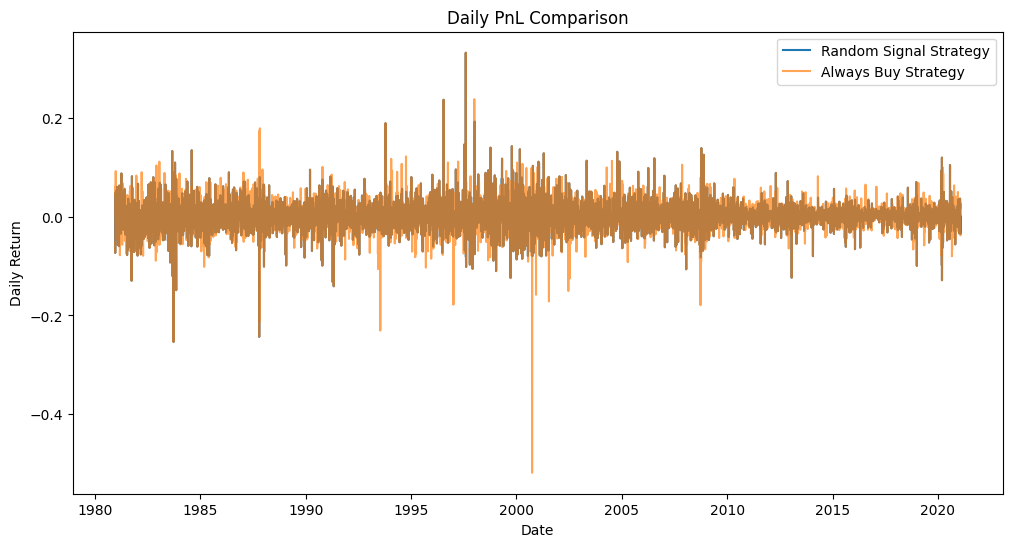

In [8]:
# Exercise 4: Backtest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv('AAPL.csv')

# Convert Date to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Drop missing values
df = df.dropna()

# Compute daily future return based on adjusted close price
df['future_return'] = (df['Adj Close'].shift(-1) - df['Adj Close']) / df['Adj Close']

print(df[['Adj Close', 'future_return']].head())

# Random signal with p=0.5
np.random.seed(42)
df['long_only_signal'] = np.random.choice([0, 1], size=len(df))

print(df[['long_only_signal']].head())

df['strategy_return'] = df['long_only_signal'] * df['future_return']

# Total PnL
total_pnl = df['strategy_return'].sum()
print("Total PnL of strategy:", total_pnl)

df['always_buy_return'] = df['future_return']  # since always buy
total_pnl_always = df['always_buy_return'].sum()
print("Total PnL of always-buy strategy:", total_pnl_always)

plt.figure(figsize=(12,6))
plt.plot(df.index, df['strategy_return'], label='Random Signal Strategy')
plt.plot(df.index, df['always_buy_return'], label='Always Buy Strategy', alpha=0.7)
plt.title('Daily PnL Comparison')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()



